In [10]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [11]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
print(type(html_soup))

<class 'bs4.BeautifulSoup'>


## practice 1 (to get the fisrt_movie object from html_soup obj)

In [12]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [52]:
for i in range(10):
    first_movie = movie_containers[i]
    print(first_movie.div)
    print(type(first_movie))
    print(len(first_movie))
    #print(first_movie)
first_movie = movie_containers[0]

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<class 'bs4.element.Tag'>
7
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt0451279"></div>
</div>
<class 'bs4.element.Tag'>
7
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3896198"></div>
</div>
<class 'bs4.element.Tag'>
7
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt5013056"></div>
</div>
<class 'bs4.element.Tag'>
7
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt2527336"></div>
</div>
<class 'bs4.element.Tag'>
7
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3501632"></div>
</div>
<class 'bs4.element.Tag'>
7
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt2250912"></div>
</div>
<class

In [53]:
print(first_movie.a.prettify())

<a href="/title/tt3315342/?ref_=adv_li_i">
 <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a>



In [54]:
print(first_movie.h3.prettify())

<h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">
  1.
 </span>
 <a href="/title/tt3315342/?ref_=adv_li_tt">
  Logan
 </a>
 <span class="lister-item-year text-muted unbold">
  (2017)
 </span>
</h3>



In [62]:
first_title = first_movie.h3.a.text
first_year = first_movie.h3.find(class_="lister-item-year text-muted unbold")
print(first_title, first_year)

Logan <span class="lister-item-year text-muted unbold">(2017)</span>


In [63]:
print(first_title, first_year.text)

Logan (2017)


## The IMDB rating

In [67]:
# first way
print(first_movie.strong)
print(first_movie.strong.text)
# second way
first_rating = first_movie.find(class_='inline-block ratings-imdb-rating').text
print(first_rating)

<strong>8.1</strong>
8.1


8.1



## Metascore

In [127]:
first_metascore = first_movie.find(class_='inline-block ratings-metascore')
print(first_metascore)
print(first_metascore.text)

<div class="inline-block ratings-metascore">
<span class="metascore favorable">77        </span>
        Metascore
            </div>

77        
        Metascore
            


In [128]:
print(first_metascore.span.text)

77        


In [123]:
# better way (using distinctive class attribute)
print(first_movie.find('span', class_ = 'metascore favorable'))
print(first_movie.find('span', class_ = 'metascore favorable').text)
#first_mscore = first_movie.find('span', class_ = 'metascore favorable')
#first_mscore

<span class="metascore favorable">77        </span>
77        


## The number of votes

In [81]:
print(first_movie.find(class_='sort-num_votes-visible'))
print(first_movie.find(class_='sort-num_votes-visible').text)

<p class="sort-num_votes-visible">
<span class="text-muted">Votes:</span>
<span data-value="545649" name="nv">545,649</span>
<span class="ghost">|</span> <span class="text-muted">Gross:</span>
<span data-value="226,277,068" name="nv">$226.28M</span>
</p>

Votes:
545,649
| Gross:
$226.28M



In [83]:
print(first_movie.find(class_='sort-num_votes-visible').span.find(name='nv'))

None


In [90]:
print(first_movie.find(class_='sort-num_votes-visible').find_all('span')[1].text)

545,649


In [97]:
# another way (using attrib)
first_votes = first_movie.find('span', attrs = {'name':'nv'})
print(type(first_votes))
print(first_votes)
print(first_votes['data-value'])

<class 'bs4.element.Tag'>
<span data-value="545649" name="nv">545,649</span>
545649


In [98]:
first_votes = int(first_votes['data-value'])
print(first_votes)

545649


# The script for a single page

In [129]:
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

for container in movie_containers:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        names.append(container.h3.a.text)
        years.append(container.h3.find('span', class_ = 'lister-item-year').text)
        imdb_ratings.append(container.strong.text)
        try:
            tempp = container.find('span', class_ = 'metascore favorable').text
        except:
            tempp = None
        metascores.append(tempp)
        votes.append(container.find('span', attrs = {'name':'nv'}).text)
        

In [140]:
import pandas as pd
df = pd.DataFrame({'movie' : names,
                  'year' : years,
                  'imdb' : imdb_ratings,
                  'metascore' : metascores,
                  'votes' : votes})
display(df)
df = df[['movie', 'imdb']]
display(df)

,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,"545,649"
1,Wonder Woman,(2017),7.5,76,"475,456"
2,Guardians of the Galaxy Vol. 2,(2017),7.7,67,"459,921"
3,Dunkirk,(2017),7.9,94,"456,634"
4,Star Wars: Episode VIII - The Last Jedi,(2017),7.2,85,"452,202"
5,Thor: Ragnarok,(2017),7.9,74,"451,209"
6,Spider-Man: Homecoming,(2017),7.5,73,"404,045"
7,Get Out,(I) (2017),7.7,84,"384,995"
8,Blade Runner 2049,(2017),8.0,81,"368,870"
9,Baby Driver,(2017),7.6,86,"353,156"


,movie,imdb
0,Logan,8.1
1,Wonder Woman,7.5
2,Guardians of the Galaxy Vol. 2,7.7
3,Dunkirk,7.9
4,Star Wars: Episode VIII - The Last Jedi,7.2
5,Thor: Ragnarok,7.9
6,Spider-Man: Homecoming,7.5
7,Get Out,7.7
8,Blade Runner 2049,8.0
9,Baby Driver,7.6


In [156]:
np.average([i for i in range(55)])

27.0

In [211]:
import matplotlib.pyplot as plt
import numpy as np

In [175]:
print(df.mean(), 'j')
print(type(list(df['imdb'])))
#print(df['imdb'].text.mean())
aa = list(df['imdb'].astype(float))
print(np.average(aa))

#avg = np.average(int(list(df['imdb'])))

Series([], dtype: float64) j
<class 'list'>
7.117777777777778


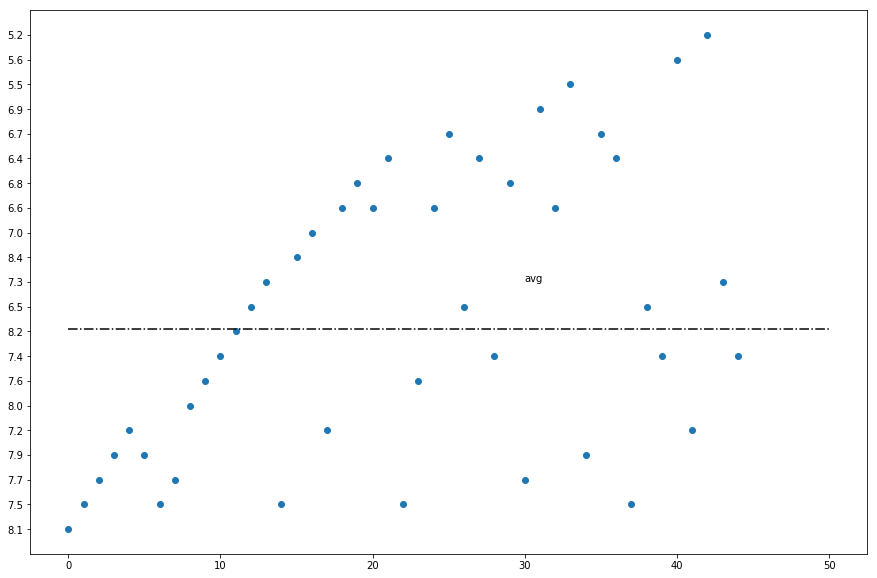

In [209]:
plt.figure(figsize=(15,10))
plt.scatter([i for i in range(len(df['imdb']))],df['imdb'])
resol = 100
plt.plot(np.linspace(0, 50, resol), [aa[0] for _ in range(resol)], color = 'k', linestyle="-.", markersize=100)
plt.text(30, 10, 'avg')
plt.show()

# The script for multiple pages

In [ ]:
# Controlling the crawl-rate
# 1. Making all the requests we want from within the loop.
# 2. Controlling the loop’s rate to avoid bombarding the server with requests.
# 3. Monitoring the loop while it runs.


In [ ]:
pages = [str(i) for i in range(1, 5)]
years_url = [str(i) for i in range(2000, 2018)]

## Controlling the crawl-rate

In [220]:
from time import sleep
from random import randint

rapsed = 0
while True: ### while 문 문법 익히기.
    print('Blah')
    temp_rnd =randint(1,2)
    rapsed += temp_rnd
    print('time rapsed:', rapsed)
    sleep(temp_rnd)

Blah
time rapsed: 1
Blah
time rapsed: 3
Blah
time rapsed: 4
Blah
time rapsed: 6
Blah
time rapsed: 7
Blah
time rapsed: 8
Blah
time rapsed: 9
Blah
time rapsed: 11
Blah
time rapsed: 13
Blah
time rapsed: 14
Blah
time rapsed: 16
Blah
time rapsed: 18
Blah
time rapsed: 19
Blah
time rapsed: 21
Blah
time rapsed: 22


KeyboardInterrupt: 

In [243]:
import time
from IPython.core.display import clear_output
start_time = time.time()
#timestart_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time.time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, round(requests/elapsed_time, 4)))
    clear_output(wait = True)

Request: 5; Frequency: 0.4998 requests/s


In [244]:
from warnings import warnwarn("Warning Simulation")

SyntaxError: invalid syntax (<ipython-input-244-d4c794ac1a60>, line 1)

We chose a warning over breaking the loop because there’s a good possibility we’ll scrape enough data, even if some of the requests fail. We will only break the loop if the number of requests is greater than expected.

## Piecing everything together

In [254]:
import time
from IPython.core.display import clear_output
start_time = time.time()
#timestart_time = time()
requests = 0

pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2016,2018)]
soups = []
for i in range(len(years_url)):
    for j in range(len(pages)):
    # A request would go here
        requests += 1
        sleep(randint(1,3))
        elapsed_time = time.time() - start_time
        print('Request: {}; Frequency: {} requests/s'.format(requests, round(requests/elapsed_time, 4)))
        print(i, j)
        url = ('http://www.imdb.com/search/title?release_date='
               +years_url[i]+'&sort=num_votes,desc&page='+pages[j])
        response = get(url)
        print(response.text[:500])

        soups.append(BeautifulSoup(response.text, 'html.parser'))
        print('~~~soup has been cooked~~~')
        clear_output(wait = True)
print('@*$#$ All the soup is ready to be served')

Request: 8; Frequency: 0.2992 requests/s
1 3


<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",
soup has been cooked


In [260]:
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
for i in range(len(soups)):
    movie_containers = soups[i].find_all('div', class_='lister-item mode-advanced')
    for container in movie_containers:
        if container.find('div', class_ = 'ratings-metascore') is not None:
            names.append(container.h3.a.text)
            years.append(container.h3.find('span', class_ = 'lister-item-year').text)
            imdb_ratings.append(container.strong.text)
            try:
                tempp = container.find('span', class_ = 'metascore favorable').text
            except:
                tempp = None
            metascores.append(tempp)
            votes.append(container.find('span', attrs = {'name':'nv'}).text)


In [266]:
DF = pd.DataFrame({'names': names,
                  'years': years,
                  'imdb_ratings': imdb_ratings,
                  'metascores': metascores,
                  'votes': votes,})
display(DF)

,names,years,imdb_ratings,metascores,votes
0,Deadpool,(2016),8.0,65,"807,596"
1,Batman v Superman: Dawn of Justice,(2016),6.5,None,"569,630"
2,Captain America: Civil War,(2016),7.8,75,"561,453"
3,Suicide Squad,(2016),6.1,None,"523,932"
4,Arrival,(II) (2016),7.9,81,"505,317"
5,Doctor Strange,(2016),7.5,72,"493,899"
6,Rogue One,(2016),7.8,65,"470,044"
7,La La Land,(I) (2016),8.0,93,"427,679"
8,Jutopia,(2016),8.0,78,"377,054"
9,Hacksaw Ridge,(2016),8.1,71,"359,594"


8.0
<class 'str'>


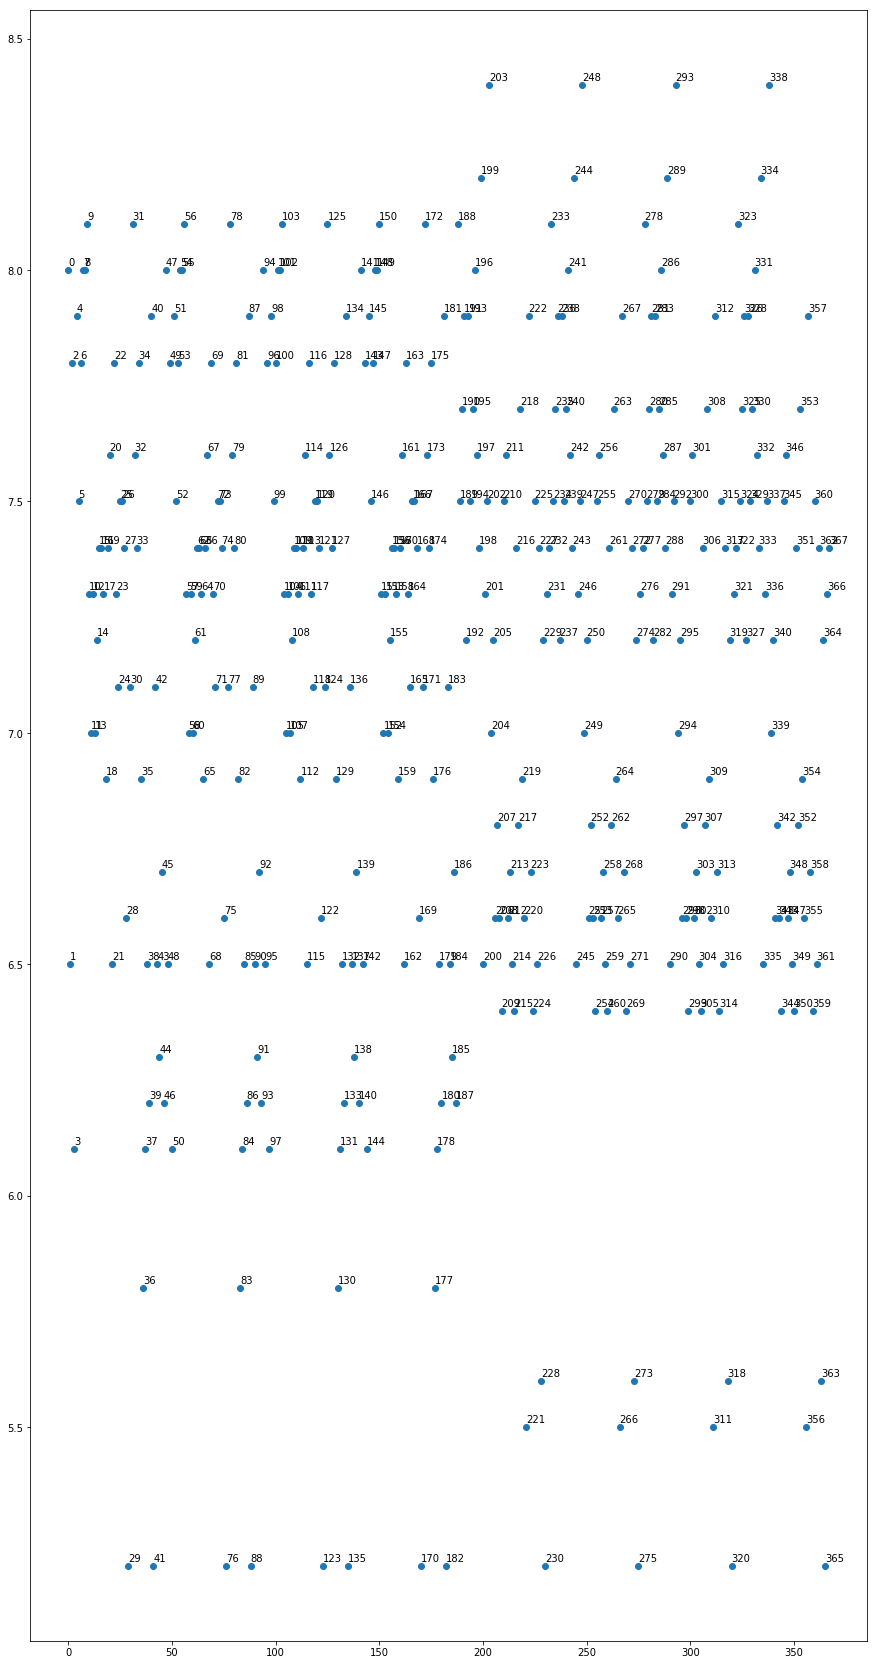

In [291]:
plt.figure(figsize=(15,30))
print(DF['imdb_ratings'][0])
print(type(DF['imdb_ratings'][0]))
plt.scatter([i for i in range(len(DF['imdb_ratings']))],
            [float(DF['imdb_ratings'][i]) for i in range(len(DF['imdb_ratings']))])
for i in range(len(DF['imdb_ratings'])):
    plt.text(i, float(DF['imdb_ratings'][i])+0.01, i) 
plt.show()
sleep(0.05)


8.0
<class 'str'>


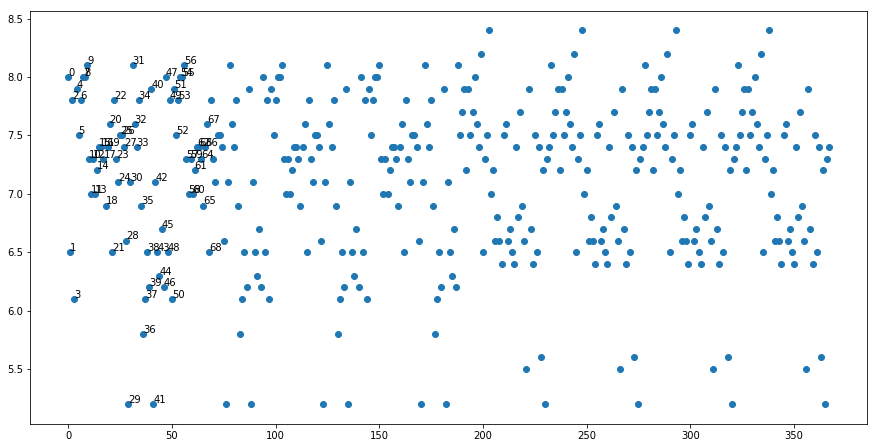

KeyboardInterrupt: 

In [301]:

for i in range(len(DF['imdb_ratings'])):
    clear_output(wait = True)
    plt.figure(figsize=(15,7.6))
    print(DF['imdb_ratings'][0])
    print(type(DF['imdb_ratings'][0]))
    plt.scatter([i for i in range(len(DF['imdb_ratings']))],
                [float(DF['imdb_ratings'][i]) for i in range(len(DF['imdb_ratings']))])
    for j in range(i):
        plt.text(j, float(DF['imdb_ratings'][j])+0.01, j)
    plt.show()
    sleep(0.01)

In [ ]:
plt.figure(figsize=(15,30))
print(DF['imdb_ratings'][0])
print(type(DF['imdb_ratings'][0]))
plt.scatter([i for i in range(len(DF['imdb_ratings']))],
            [float(DF['imdb_ratings'][i]) for i in range(len(DF['imdb_ratings']))])
# for i in range(len(DF['imdb_ratings'])):
#     plt.text(i, float(DF['imdb_ratings'][i])+0.01, i) 
plt.show()
sleep(0.05)
